# Fit the complete data (With sWeights and without sWeights)
This file is fitting for different cuts on the BDT variable

- Fit on $m(B^0_s)$ with $m(3\pi)$ around $m(D_s)$ and sWeights
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$ (gaussian)
    - Background of partially reconstructed decays (gaussian)
    - Combinatorial background (exponential)
- Fit on $m(B^0_s)$ with:
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$ (sum of two Crystall ball PDF)
    - Background $B^0 \to D^{*-} D_s^+$ from the other fit of the simultaneous fit
    - Background with a misidentified pion: $B^0 \to D^{*-} K^+ \pi^+ \pi^-$ (sum of two crystall ball PDF)
    - Background of partially reconstructed decays $B^0 \to D^{*-} \pi^+ \pi^+ \pi^- h$ (gaussian)
    - Combinatorial background (exponential)

Those two fits are not simultaneous

## Import

In [1]:
import zfit
import json
import numpy as np

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import launch_fit, save_params, plot_hist_fit, plot_hist_fit_particle

Welcome to JupyROOT 6.22/02


## Load

In [2]:
# Mean of the distribution of the partially reconstructed data
with open(f'{loc.JSON}/data_strip_p/all_data_strip_params.json', 'r') as f:
    mu2_p = json.load(f)['mu2']


In [3]:
df_data_strip = fct.load_data(years, magnets, type_data='data_strip', vars=['B0_M', 'BDT'],
                            cut_DeltaM=True)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/data_strip/all_data_strip.root


In [4]:
df_data_strip_Ds = fct.load_data(years, magnets, type_data='data_strip', vars=['B0_M', 'BDT', 'sWeight'],
                            cut_DeltaM=True, cut_tau_Ds=True)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/data_strip/data_strip_B0toDstDs.root


In [5]:
name_data = 'all_data_strip_cutDeltaM_V8'
name_data_B0Ds = 'all_data_strip_cutDeltaM_Ds_weighted_V8'

## cut on BDT

In [6]:
cut_BDT = -0.2
k = str(cut_BDT)

In [7]:
df = df_data_strip.query(f"BDT > {cut_BDT}")

In [8]:
df_Ds = df_data_strip_Ds.query(f"BDT > {cut_BDT}")

In [9]:
cut_BDT_ref = -0.2

In [10]:
def format_previous_params(data_strip_params_recup):
    data_strip_params_recup_formatted = {}
    for key, value in data_strip_params_recup.items():
        if not key.endswith('_err'):
            index = key.find('|')
            data_strip_params_recup_formatted[key[:index]] = value
    
    return data_strip_params_recup_formatted

In [13]:
if cut_BDT_ref == -0.2:
    with open(f'{loc.JSON}/{name_data}_fixedTails_params.json', 'r') as f:
        params_r = json.load(f)
    with open(f'{loc.JSON}/{name_data_B0Ds}_params.json', 'r') as f:
        params_B0Ds_r = json.load(f)
    
else:
    with open(f'{loc.JSON}/{name_data}_BDT{cut_BDT_ref}_params.json', 'r') as f:
        params_recup = json.load(f)

    params_r = format_previous_params(params_recup)
    
    with open(f'{loc.JSON}/{name_data_B0Ds}_BDT{cut_BDT_ref}_params.json', 'r') as f:
        B0Ds_params_recup = json.load(f)
    
    B0Ds_params_r = format_previous_params(B0Ds_params_recup)

In [15]:
params_B0Ds_r

{'lambda_B0Ds': -1.2411984469384851e-07,
 'lambda_B0Ds_err': 2.7460058127293605e-05,
 'mu_B0Ds': 5279.889761795335,
 'mu_B0Ds_err': 0.5893978455799641,
 'n_bkg2_B0Ds': 812.9580581180961,
 'n_bkg2_B0Ds_err': 59.255274683347125,
 'n_bkg_B0Ds': 200.08929991695663,
 'n_bkg_B0Ds_err': 72.221092594892,
 'n_sig_B0Ds': 1563.707485562504,
 'n_sig_B0Ds_err': 44.72655904234506,
 'sigma2_B0Ds': 76.25804130525381,
 'sigma2_B0Ds_err': 4.00029522770336,
 'sigma_B0Ds': 15.239571632704873,
 'sigma_B0Ds_err': 0.5391430818058889}

## Fit on weighted `B0_M` with `|tau_M-1969|<50`

### Data

In [17]:
size_tau_M = 50.
mean_tau_M = 1969.
low_tau_M = mean_tau_M - size_tau_M
high_tau_M = mean_tau_M + size_tau_M

In [18]:
low_B0Ds = 5150.
high_B0Ds = 5360.

### Distributions

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:617: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


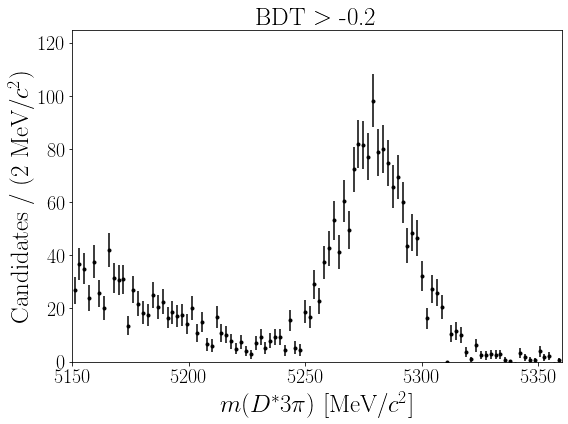

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_all_data_strip_cutDeltaM_Ds_weighted_V8_BDT-0.2.pdf


In [35]:
fct.plot_hist_particle({name_data_B0Ds:df_Ds},'B0_M',
              low = low_B0Ds, high = high_B0Ds, cut_BDT = k,
              n_bins = 100, mode_hist = False, colors='black', weights=df_Ds['sWeight'])

### Intial values

In [19]:
n_events_B0Ds = len(df_Ds.query(f'B0_M > {low_B0Ds} and B0_M < {high_B0Ds}'))

n_sig_k = params_B0Ds_r['n_sig_B0Ds']
n_bkg_k = params_B0Ds_r['n_bkg_B0Ds']
n_bkg2_k = params_B0Ds_r['n_bkg2_B0Ds']

# for BDT = -2.0
initial_values_B0Ds = {
    # Signal
    'mu_B0Ds'       :{ 'value': params_B0Ds_r['mu_B0Ds']      , 'low': 5279.-4.       , 'high': 5279.+4.             , 'floating': True},
    'sigma_B0Ds'    :{ 'value': params_B0Ds_r['sigma_B0Ds']   , 'low': 15.-5.        , 'high': 15.+5.                , 'floating': True},
    'n_sig_B0Ds'    :{ 'value': n_sig_k                       , 'low': 0              , 'high': n_events_B0Ds        , 'floating': True},
    # Combinatorial background
    'lambda_B0Ds'   :{ 'value': params_B0Ds_r['lambda_B0Ds']  , 'low': -0.1           , 'high': -0.0000001           , 'floating': True},
    'n_bkg_B0Ds'    :{ 'value': n_bkg_k                       , 'low': 0              , 'high': n_events_B0Ds        , 'floating': True},
    # Partially reconstructed particles
    'mu2_B0Ds'      :{ 'value': mu2_p                         , 'low': 4800.          , 'high': 5150.                , 'floating': False},
    'sigma2_B0Ds'   :{ 'value': params_B0Ds_r['sigma2_B0Ds']  , 'low': 50.            , 'high': 90.                  , 'floating': True},
    'n_bkg2_B0Ds'   :{ 'value': n_bkg2_k                      , 'low': 0              , 'high': n_events_B0Ds        , 'floating': True},
}

### Observables and variables

In [22]:
obs_B0Ds = zfit.Space("x", limits=(low_B0Ds, high_B0Ds))

zparams_B0Ds = {}
for var in initial_values_B0Ds.keys():
    zparams_B0Ds[var] = zfit.Parameter(f"{var}|BDT{cut_BDT}",
                                      initial_values_B0Ds[var]['value'], 
                                      initial_values_B0Ds[var]['low'], 
                                      initial_values_B0Ds[var]['high'],
                                      floating = initial_values_B0Ds[var]['floating'])

In [23]:
name_params_B0Ds = {
    # Signal
    f'mu_B0Ds|BDT{cut_BDT}'      : '$\mu_S$',
    f'sigma_B0Ds|BDT{cut_BDT}'   : '$\\sigma_S$',
    f'n_sig_B0Ds|BDT{cut_BDT}'   : '$n_S$',
    # Combinatorial background
    f'n_bkg_B0Ds|BDT{cut_BDT}'   : '$n_{B,c}$',
    f'lambda_B0Ds|BDT{cut_BDT}'  : '$\\lambda_{B,c}$',
    # Partially reconstructed background
    f'mu2_B0Ds|BDT{cut_BDT}'     : '$\\mu_{B, D^*3 D_s h}$',
    f'sigma2_B0Ds|BDT{cut_BDT}'  : '$\\sigma_{B, D^* D_s h}$',
    f'n_bkg2_B0Ds|BDT{cut_BDT}'  : '$n_{B, D^* D_s h}$',
}

### PDFs

In [25]:
gaussianS_B0Ds = zfit.pdf.Gauss(zparams_B0Ds[f'mu_B0Ds'],zparams_B0Ds['sigma_B0Ds'],obs=obs_B0Ds)
exponential_B0Ds = zfit.pdf.Exponential(zparams_B0Ds['lambda_B0Ds'], obs=obs_B0Ds)
gaussian_B0Ds = zfit.pdf.Gauss(zparams_B0Ds['mu2_B0Ds'],zparams_B0Ds['sigma2_B0Ds'],obs=obs_B0Ds)

gaussianS_B0Ds_ext = gaussianS_B0Ds.create_extended(zparams_B0Ds['n_sig_B0Ds'])
exponential_B0Ds_ext = exponential_B0Ds.create_extended(zparams_B0Ds['n_bkg_B0Ds'])
gaussian_B0Ds_ext = gaussian_B0Ds.create_extended(zparams_B0Ds['n_bkg2_B0Ds'])

model_B0Ds = zfit.pdf.SumPDF([gaussianS_B0Ds_ext, exponential_B0Ds_ext, gaussian_B0Ds_ext])
data_B0Ds = zfit.Data.from_pandas(df_Ds['B0_M'], obs=obs_B0Ds, weights=df_Ds['sWeight'])

### Fitting

In [26]:
import timeit
start = timeit.default_timer()
result_B0Ds, params_B0Ds = launch_fit( model_B0Ds, data_B0Ds, extended=True)
stop = timeit.default_timer()
print('Time to do the fit: ', stop - start) 

------------------------------------------------------------------
| FCN = -4299                   |     Ncalls=292 (292 total)     |
| EDM = 0.000223 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/zfit/minimizers/fitresult.py:46: ExperimentalFeatureWarning: The computation of the covariance matrix with weights is still experimental.
  ExperimentalFeatureWarning)


name                      value    minuit_hesse    at limit
-------------------  ----------  --------------  ----------
n_sig_B0Ds|BDT-0.2         1459     +/-      40       False
n_bkg_B0Ds|BDT-0.2        131.9     +/-      50       False
n_bkg2_B0Ds|BDT-0.2       741.6     +/-      43       False
mu_B0Ds|BDT-0.2            5280     +/-     0.6       False
sigma_B0Ds|BDT-0.2        15.34     +/-    0.55       False
lambda_B0Ds|BDT-0.2  -1.113e-05     +/- 0.00043       False
sigma2_B0Ds|BDT-0.2       74.25     +/-     3.7       False
Time to do the fit:  21.18415120895952


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:549: UserWarning: The function <function Space.limits at 0x7f95785934d0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5360.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:617: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:37: UserWarning: The function <function Space.area at 0x7f95785988c0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5360.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is i

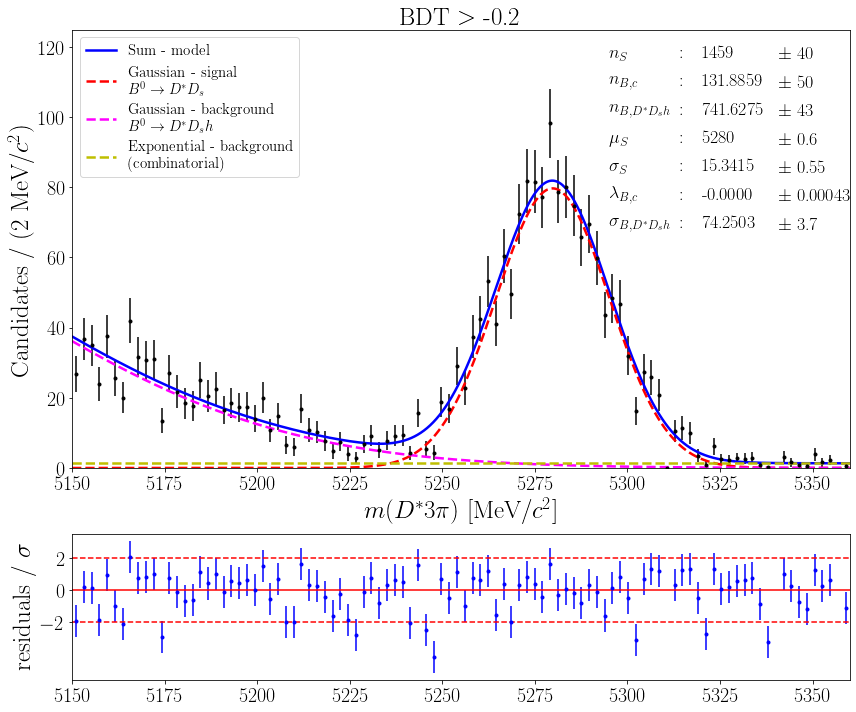

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/all_data_strip_cutDeltaM_V8/B0_M_all_data_strip_cutDeltaM_Ds_weighted_V8_fit_BDT-0.2.pdf


In [27]:
plot_hist_fit_particle(df_Ds,'B0_M', models = [model_B0Ds, gaussianS_B0Ds_ext, gaussian_B0Ds_ext, exponential_B0Ds_ext],
                       name_models = ["", '\n $B^0\\to D^*D_s$','\n $B^0\\to D^*D_s h$',
                                      '\n (combinatorial)'], cut_BDT=k,
                       obs=obs_B0Ds, n_bins = 100,mode_hist = False,
                       name_data = name_data_B0Ds, name_folder=name_data,
                       colors=['b','r','magenta','y'], weights=df_Ds['sWeight'],
                       params=params_B0Ds,name_params=name_params_B0Ds,
                       colWidths=[0.05,0.01,0.05,0.04],
                       fontsize_res = 18.,
                       fontsize_leg=15)

In [28]:
save_params(params_B0Ds, name_data_B0Ds+f'_BDT{cut_BDT}', True)

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/all_data_strip_cutDeltaM_Ds_weighted_V8_BDT-0.2_params.json


## Fit on the full `B0_M`

### Data

In [29]:
# Result of the fit on the MC D0S->D*pipipi data with one of the pi misidentified as a kaon
with open(f'{loc.JSON}/data_KPiPi_2_params.json', 'r') as f:
    data_KPiPi_params = json.load(f)

for var in 'muL', 'muR', 'sigmaL', 'sigmaR': # conversion GeV -> MeV
    data_KPiPi_params[var] = data_KPiPi_params[var]*1000
    data_KPiPi_params[f"{var}_err"] = data_KPiPi_params[f"{var}_err"]*1000    
    
# Result of the previous fit on the B0_M sWeighted distribution with cut on tau_M around m(Ds)
with open(f'{loc.JSON}/{name_data_B0Ds}_BDT{cut_BDT}_params.json', 'r') as f:
    data_B0Ds_params = json.load(f)


    
# Result of the fit on the MC signal data
with open(f'{loc.JSON}/MC_params.json', 'r') as f:
    MC_param_results = json.load(f)

In [30]:
low = 5150.
high = 5550.

### Distribution

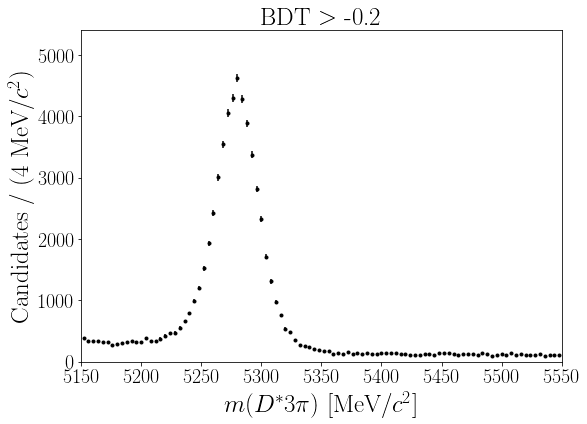

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_all_data_strip_cutDeltaM_V8_BDT-0.2.pdf


In [59]:
fct.plot_hist_particle({name_data:df},'B0_M',
              low = low, high = high, cut_BDT=cut_BDT,
              n_bins = 100, mode_hist = False, colors='black')

### Initial values

In [33]:
n_events_B0_M = len(df.query(f'B0_M > {low} and B0_M < {high}'))

n_sig_k = params_r['n_sig']
n_bkg_k = params_r['n_bkg']
n_bkg2_k = params_r['n_bkg2']

initial_values = {
    # Signal        
    'mu'       :{ 'value': params_r['mu']                , 'low': 5279.-5.       , 'high': 5279.+5.             , 'floating': True},
    'sigmaL'   :{ 'value': params_r['sigmaL']            , 'low': 17.-15.        , 'high': 17.+15.              , 'floating': True},
    'sigmaR'   :{ 'value': params_r['sigmaR']            , 'low': 17.-15.        , 'high': 17+15.               , 'floating': True},
    'alphaL'   :{ 'value': MC_param_results['alphaL_MC'] , 'low': 0.1            , 'high': 10.                  , 'floating': False},
    'alphaR'   :{ 'value': -MC_param_results['alphaR_MC'], 'low': -10.            , 'high': -0.1                , 'floating': False},
    'nL'       :{ 'value': MC_param_results['nL_MC']     , 'low': 0.1            , 'high': 200.                 , 'floating': False},
    'nR'       :{ 'value': MC_param_results['nR_MC']     , 'low': 1.             , 'high': 200.                 , 'floating': False},
    'frac'     :{ 'value': params_r['frac']              , 'low': 0.1              , 'high': 1.                 , 'floating': True},
    'n_sig'    :{ 'value': n_sig_k                       , 'low': n_sig_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
    # Combinatorial background        
    'lambda'   :{ 'value': params_r['lambda']            , 'low': -0.01          , 'high': -0.00001             , 'floating': True},
    'n_bkg'    :{ 'value': n_bkg_k                       , 'low': n_bkg_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
    # Partially reconstructed particles        
    'mu2'      :{ 'value': mu2_p                         , 'low': 4800.          , 'high': 5150.                , 'floating': False},
    'sigma2'   :{ 'value': 80.                           , 'low': 10.            , 'high': 5150.-mu2_p          , 'floating': True},
    'n_bkg2'   :{ 'value': n_bkg2_k                      , 'low': 0              , 'high': n_events_B0_M        , 'floating': True},
    # Background decay D*Kpipi    
#     'n_bkgK'   :{ 'value': n_bkgK_k                      , 'low': 0              , 'high': n_events_B0_M        , 'floating': True},
    'r_bkgK'   :{ 'value': params_r['r_bkgK']            , 'low': 0.0001          , 'high': 0.5                   , 'floating': True},
}



for var in 'muL', 'muR', 'sigmaL', 'sigmaR', 'nL', 'nR', 'alphaL', 'alphaR', 'nL', 'nR', 'fraction':
    initial_values[f'{var}_K'] = {'value': data_KPiPi_params[var], 'low': None, 'high': None, 'floating': False}

for var in 'mu', 'sigma', 'n_sig' :
    initial_values[f'{var}_Ds'] = {'value': data_B0Ds_params[f'{var}_B0Ds|BDT{cut_BDT}'], 'low': None, 'high': None, 'floating': False}

In [43]:
print(params_r)

{'frac': 0.36597131077116174, 'frac_err': 0.04477506730478005, 'lambda': -0.0009777775211016401, 'lambda_err': 0.00013214752145974877, 'mu': 5279.670672196767, 'mu_err': 0.10997239662751408, 'n_bkg': 30227.08034829059, 'n_bkg2': 374.4189048511811, 'n_bkg2_err': 98.06063968504371, 'n_bkg_err': 487.8285911284329, 'n_sig': 51946.003209612085, 'n_sig_err': 389.070934645212, 'r_bkgK': 0.032785384091824694, 'r_bkgK_err': 0.007686768256103177, 'sigma2': 33.46084345188925, 'sigma2_err': 5.115606474058789, 'sigmaL': 12.927803255733908, 'sigmaL_err': 0.5385460815292429, 'sigmaR': 21.824391433321082, 'sigmaR_err': 0.37977894852605804}


### Observables and variables

In [37]:
# obs = zfit.Space("x", limits=(low, high))

zparams = {}
for var in initial_values.keys():
    zparams[var] = zfit.Parameter(f"{var}|BDT{cut_BDT}",
                                  initial_values[var]['value'], 
                                  initial_values[var]['low'], 
                                  initial_values[var]['high'],
                                  floating = initial_values[var]['floating'])


mult = lambda r, n: r*n
zparams["n_bkgK"] = zfit.ComposedParameter(f"n_bkgK|BDT{cut_BDT}", mult, params=[zparams['r_bkgK'],zparams['n_sig']])

In [38]:
name_params = {
    # Signal
    f'mu|BDT{cut_BDT}'      : '$\mu_S$',
    f'sigmaL|BDT{cut_BDT}'  : '$\\sigma_{L_S}$',
    f'sigmaR|BDT{cut_BDT}'  : '$\\sigma_{R_S}$',    
    f'alphaL|BDT{cut_BDT}'  : '$\\alpha_{L_S}$',
    f'alphaR|BDT{cut_BDT}'  : '$\\alpha_{R_S}$',
    f'nL|BDT{cut_BDT}'      : '$n_L_S$',
    f'nR|BDT{cut_BDT}'      : '$n_R_S$',
    f'frac|BDT{cut_BDT}'    : '$f_{S, \\frac{L}{R}}$',
    f'n_sig|BDT{cut_BDT}'   : '$n_S$',
    # Combinatorial background
    f'n_bkg|BDT{cut_BDT}'   : '$n_{B,c}$',
    f'lambda|BDT{cut_BDT}'  : '$\\lambda_{B,c}$',
    # Partially reconstructed brackground
    f'mu2|BDT{cut_BDT}'     : '$\\mu_{B,D^*3\pi h}$',
    f'sigma2|BDT{cut_BDT}'  : '$\\sigma_{B,D^*3\pi h}$',
    f'n_bkg2|BDT{cut_BDT}'  : '$n_{B,D^*3\pi h}$',
    # Background decay D*Kpipi    
    f'n_bkgK|BDT{cut_BDT}'  : '$n_{B,D^*K\pi\pi}$',
    f'r_bkgK|BDT{cut_BDT}'  : '$\\frac{n_{B,D^*K\pi\pi}}{n_S}$',
}


### PDFs

In [39]:
def crystall_ball_gaussian(mu, sigma, obs, alpha=None, n=None):
    if alpha is None or n is None:
        pdf = zfit.pdf.Gauss(mu, sigma, obs=obs)
    else:
        pdf = zfit.pdf.CrystalBall(mu, sigma, alpha, n, obs=obs)
    return pdf

def sum_crystalball(muL, muR, sigmaL, sigmaR, frac, obs, alphaL=None, alphaR=None, nL=None, nR=None):
    """ Return the sum of 2 crystall ball PDFs.
    If the alpha or n is None, the corresponding distribution is a gaussian.
    """
    pdfL = crystall_ball_gaussian(muL, sigmaL, obs,
                                         alphaL,nL)
    pdfR = crystall_ball_gaussian(muR, sigmaR, obs,
                                         alphaR, nR)
    
    model = zfit.pdf.SumPDF([pdfL, pdfR], fracs=frac)
    
    return model, pdfL, pdfR

In [41]:
model_S, crystalBallL_S, crystalBallR_S = sum_crystalball(zparams['mu'], zparams['mu'],
                                                          zparams['sigmaL'], zparams['sigmaR'],
                                                          zparams['frac'], obs,                                                          
                                                          zparams['alphaL'], zparams['alphaR'], 
                                                          zparams['nL'], zparams['nR']
                                                         )


gaussian_B0Ds = zfit.pdf.Gauss(zparams['mu_Ds'],zparams['sigma_Ds'],obs=obs)

model_K, crystalBallL_K, crystalBallR_K = sum_crystalball(zparams['muL_K'], zparams['muR_K'], 
                                                          zparams['sigmaL_K'], zparams['sigmaR_K'],
                                                          zparams['fraction_K'], obs,
                                                          zparams['alphaL_K'], zparams['alphaR_K'], 
                                                          zparams['nL_K'], zparams['nR_K'])

exponential = zfit.pdf.Exponential(zparams['lambda'], obs=obs)
gaussian = zfit.pdf.Gauss(zparams['mu2'],zparams['sigma2'],obs=obs)


model_S_ext = model_S.create_extended(zparams['n_sig'])
exp_ext = exponential.create_extended(zparams['n_bkg'])
gaussian_ext = gaussian.create_extended(zparams['n_bkg2'])
gaussian_B0Ds_ext = gaussian_B0Ds.create_extended(zparams['n_sig_Ds'])
model_K_ext = model_K.create_extended(zparams['n_bkgK'])

model = zfit.pdf.SumPDF([model_S_ext, gaussian_B0Ds_ext, gaussian_ext, model_K_ext, exp_ext]) # gauss is folded by frac
data = zfit.Data.from_pandas(df['B0_M'], obs=obs)

### Fit

In [42]:
import timeit
start = timeit.default_timer()
result, params = launch_fit(model, data, extended=True)
stop = timeit.default_timer()
print('Time to do the fit: ', stop - start) 

------------------------------------------------------------------
| FCN = -3.307e+05              |    Ncalls=1299 (1299 total)    |
| EDM = 0.00103 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
name                value    minuit_hesse    at limit
--------------  ---------  --------------  ----------
n_sig|BDT-0.2       48330     +/- 8.5e+02       False
n_bkg2|BDT-0.2        313     +/- 

Info: DavidonErrorUpdator: delgam < 0 : first derivatives increasing along search line
Info: VariableMetricBuilder: matrix not pos.def, gdel > 0
Info: gdel = 163257
Info in negative or zero diagonal element in covariance matrix : i = 9
Info in added to diagonal of Error matrix a value : dg = 0.54128
Info: gdel = -5.2407e+06
Info: DavidonErrorUpdator: delgam < 0 : first derivatives increasing along search line
Info: VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
Info in negative or zero diagonal element in covariance matrix : i = 1
Info in added to diagonal of Error matrix a value : dg = 0.500122
Info: DavidonErrorUpdator: delgam < 0 : first derivatives increasing along search line
Info: VariableMetricBuilder: matrix not pos.def, gdel > 0
Info: gdel = 0.000953006
Info in negative or zero diagonal element in covariance matrix : i = 3
Info in added to diagonal of Error matrix a value : dg = 0.50299
Info: gdel = -4.2718
Info: DavidonErrorUpdator: delgam < 0 : firs

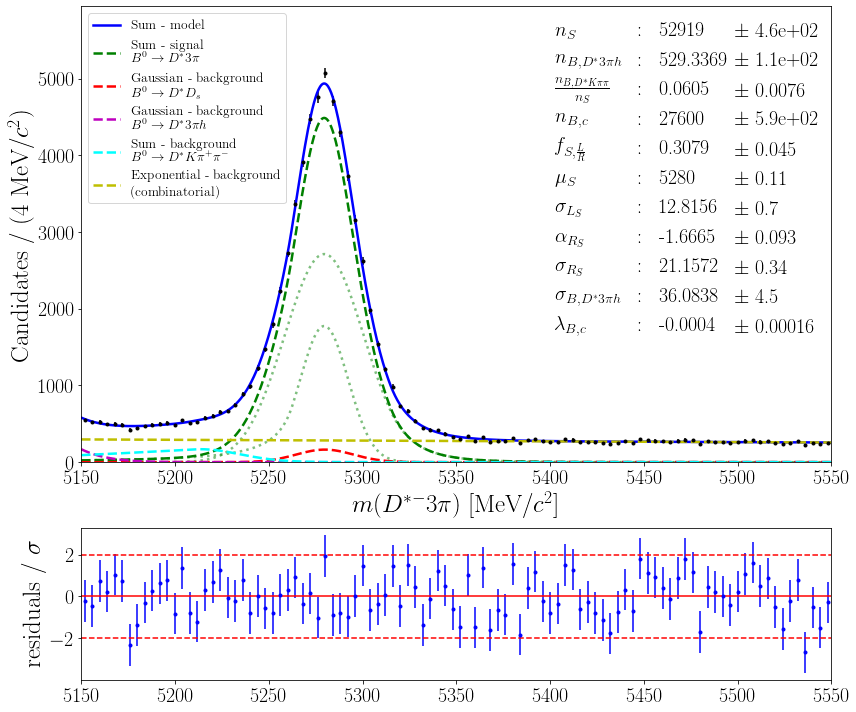

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/all_data_strip_cutDeltaM_V8_alphaRFree/B0_M_all_data_strip_cutDeltaM_V8_alphaRFree_fit.pdf


In [17]:
name_data_plot = name_data
plot_hist_fit_particle(df,'B0_M', models = [model,[model_S_ext, crystalBallL_S, crystalBallR_S], gaussian_B0Ds_ext, gaussian_ext, model_K_ext,exp_ext],
                       name_models = ["", '\n $B^0\\to D^* 3\pi$','\n $B^0\\to D^*D_s$','\n $B^0\\to D^*3\pi h$',
                                      '\n $B^0\\to D^* K \pi^+\pi^-$','\n (combinatorial)'],
                       cut_BDT=cut_BDT,
                       obs=obs, n_bins = 100,mode_hist = False,
                       name_data = name_data_plot, name_folder=name_data,
                       colors=['b','g','r','m','cyan','y'],
                       params=params,name_params=name_params,
                       fontsize_leg=13.5,
                       colWidths=[0.06,0.01,0.05,0.06]
                      )

In [18]:
save_params(params,name_data, True)

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/all_data_strip_cutDeltaM_V8_alphaRFree_params.json
